## Daily minimum temperatures in Melbourne, Australia from 1981 to 1990

In [13]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
data = pd.read_csv('daily-minimum-temperatures-in-me.csv')
X = data['Temperature'].values

In [4]:
data.shape

(3650, 2)

In [5]:
data.head()

,Date,Temperature
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [6]:
x = data["Date"]
y = data["Temperature"]

Text(0, 0.5, 'temperature')

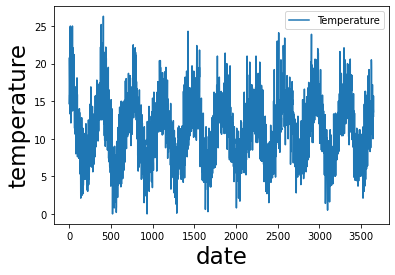

In [7]:
data[:].plot()
plt.xlabel('date', fontsize=23)
plt.ylabel('temperature', fontsize=23)

## Stationarity test 

In [8]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller 

datatest = adfuller(data['Temperature'], autolag = 'AIC')
print("1. ADF : ", datatest[0])
print("2. P-Value : ", datatest[1])
print("3. Num of Lags : ", datatest[2])
print("4. Num of Observations Used for ADF Regression and Critical Value Calculation : ", datatest[3])
print("5. Critical Value : ")
for key, val in datatest[4].items():
    print("\t",key,": ", val)

1. ADF :  -4.444804924611696
2. P-Value :  0.0002470826300361034
3. Num of Lags :  20
4. Num of Observations Used for ADF Regression and Critical Value Calculation :  3629
5. Critical Value : 
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


- In general, a p-value of less than 5% means you can reject the null hypothesis
- We use partial autocorrelation (PACF plot) to find how many past value we should consider in our model
- PACF basically gives an indication of how correlated diffrent time period values are
- Here on the x-axis is time lag. And on the y-axis we have persion corrletion cofficinet 
- Here uptill 10 lag we have decent correlation. Hence we will be using 10 lags in the model

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


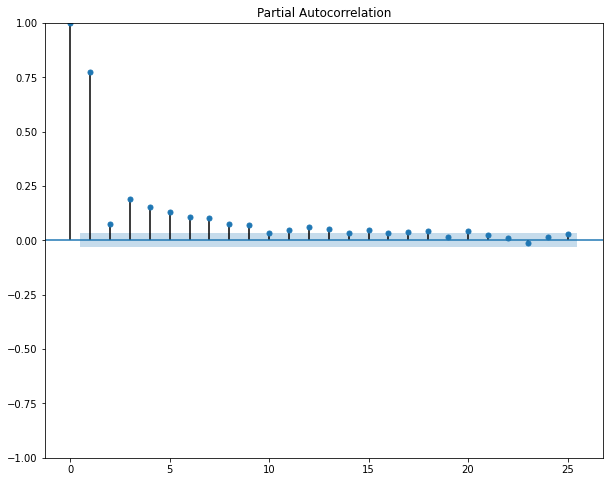

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams['figure.figsize'] = [10, 8]
pacf = plot_pacf(data['Temperature'], lags = 25)

## AutoRegression Model
AR Model of order 1
$$  
         \Upsilon_{t} = \beta_{0}+ \beta_{1}*\Upsilon _{t-1}
$$

AR Model of order 2

$$
        \Upsilon_{t} = \beta_{0}+ \beta_{1}*\Upsilon _{t-1} + \beta_{2}*\Upsilon _{t-2}
$$
AR Model of order p

$$
        \Upsilon_{t} = \beta_{0}+ \beta_{1}*\Upsilon _{t-1} + \beta_{2}*\Upsilon _{t-2}  . . . . + \beta_{p}*\Upsilon _{t-p}
$$


- <B>Stationarity of the time-series data</B>: The stationarity of the data can be found using adfuller class of statsmodels.tsa.stattools module. The value of p-value is used to determine whether there is stationarity. If the value is less than 0.05, the stationarity exists.
- <B>Order of AR model to be trained</B>: The order of AR model is determined by checking the partial autocorrelation plot. The plot_pacf method of statsmodels.graphics.tsaplots is used to plot.

## Split Dataset into Train and Test: Testing : Last 7 days

In [ ]:
train = X[:len(X)-7]
test = X[len(X)-7:]
train

array([20.7, 17.9, 18.8, ..., 13.2, 13.9, 10. ])

In [ ]:
model = AutoReg(train,lags=10).fit()

In [ ]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Thu, 14 Apr 2022   AIC                          16775.028
Time:                        23:34:53   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [ ]:
pred = model.predict(start=len(train), end=len(X)-1, dynamic=False)
pred1 = [round(num, 1) for num in pred]

Predicated temperature = [11.48, 12.64, 13.06, 13.03, 12.83, 12.66, 12.43]
Actual temperature = [12.9, 14.6, 14.0, 13.6, 13.5, 15.7, 13.0]


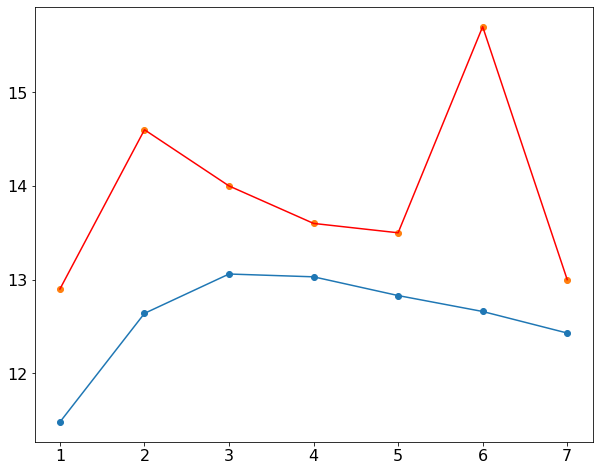

In [ ]:
g = np.linspace(1, 7, 7, endpoint=True) 
plt.scatter(g,pred1)
plt.plot(g,pred1)
plt.scatter(g,test)
plt.plot(g,test, color='red')
print("Predicated temperature =", pred1)
print("Actual temperature =", list(test))

In [ ]:
from math import sqrt 
from sklearn.metrics import mean_squared_error 
rmse = sqrt(mean_squared_error(test, pred))
print("Root mean squared error = ",round(rmse,3))

Root mean squared error =  1.564


## Moving on to next slide